# DATA EXPLORATION

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import utils.visualization_tb as vi

import warnings

warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
# Load data into a dataframe
df = pd.read_csv("data/hospital_train.csv")
df.head()

1  2  3  4  5           6  7  8    9      10    11         12  \
0                                                                        
161528   6  a  6  X  2  gynecology  R  F  4.0   45810   2.0     Urgent   
159472  23  a  6  X  4  gynecology  Q  F  2.0  128565  15.0     Trauma   
309765   2  c  5  Z  2  anesthesia  S  F  3.0   46565   5.0     Urgent   
279614  32  f  9  Y  3  gynecology  S  B  4.0  124546   6.0  Emergency   
147791  14  a  1  X  3  gynecology  S  E  2.0   22729   8.0     Urgent   

              13  14     15      16     17  
0                                           
161528  Moderate   2  21-30  2817.0   0-10  
159472  Moderate   4  51-60  4498.0  21-30  
309765  Moderate   2  71-80  4573.0  11-20  
279614  Moderate   4  11-20  7202.0  51-60  
147791  Moderate   2  51-60  3398.0  51-60

In [3]:
# Let's load dataframe column names (they are in a different file)
column_names = pd.read_csv("data/columns_meaning.csv", index_col = 0)

# I want them as dict for latter mapping
column_names = column_names.to_dict()

column_names

{'Column': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17},
 'Description': {0: 'Case_ID registered in Hospital',
  1: 'Unique code for the Hospital',
  2: 'Unique code for the type of Hospital',
  3: 'City Code of the Hospital',
  4: 'Region Code of the Hospital',
  5: 'Number of Extra rooms available in the Hospital',
  6: 'Department overlooking the case',
  7: 'Code for the Ward type',
  8: 'Code for the Ward Facility',
  9: 'Condition of Bed in the Ward',
  10: 'Unique Patient Id',
  11: 'City Code for the patient',
  12: 'Admission Type registered by the Hospital',
  13: 'Severity of the illness recorded at the time of admission',
  14: 'Number of Visitors with the patient',
  15: 'Age of the patient',
  16: 'Deposit at the Admission Time',
  17: 'Stay Days by the patient'}}

In [4]:
# Let's rename the columns
df.columns = column_names["Description"].values()
df = df.set_index("Case_ID registered in Hospital")
df.head()

ValueError: Length mismatch: Expected axis has 17 elements, new values have 18 elements

In [ ]:
# This easier to work with
# Now let's get some insights on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Case_ID registered in Hospital                             100000 non-null  int64  
 1   Unique code for the Hospital                               100000 non-null  int64  
 2   Unique code for the type of Hospital                       100000 non-null  object 
 3   City Code of the Hospital                                  100000 non-null  int64  
 4   Region Code of the Hospital                                100000 non-null  object 
 5   Number of Extra rooms available in the Hospital            100000 non-null  int64  
 6   Department overlooking the case                            100000 non-null  object 
 7   Code for the Ward type                                     100000 non-null  object 


In [ ]:
df.describe()

Case_ID registered in Hospital  Unique code for the Hospital  \
count                   100000.000000                 100000.000000   
mean                    159495.809150                     18.328240   
std                      91922.534735                      8.626225   
min                          8.000000                      1.000000   
25%                      79969.750000                     11.000000   
50%                     159595.000000                     19.000000   
75%                     239362.250000                     26.000000   
max                     318437.000000                     32.000000   

       City Code of the Hospital  \
count              100000.000000   
mean                    4.776580   
std                     3.102853   
min                     1.000000   
25%                     2.000000   
50%                     5.000000   
75%                     7.000000   
max                    13.000000   

       Number of Extra rooms available in the Hospital  \
count                                    100000.000000   
mean                                          3.197210   
std                                           1.170569   
min                                           0.000000   
25%                                           2.000000   
50%                                           3.000000   
75%                                           4.000000   
max                                          24.000000   

       Condition of Bed in the Ward  Unique Patient Id  \
count                  99967.000000      100000.000000   
mean                       2.623696       65953.074310   
std                        0.874427       37872.831751   
min                        1.000000           1.000000   
25%                        2.000000       33219.000000   
50%                        3.000000       65869.000000   
75%                        3.000000       98616.000000   
max                        4.000000      131624.000000   

       City Code for the patient  Number of Visitors with the patient  \
count               98517.000000                        100000.000000   
mean                    7.226164                             3.295470   
std                     4.717411                             1.787288   
min                     1.000000                             0.000000   
25%                     4.000000                             2.000000   
50%                     8.000000                             3.000000   
75%                     8.000000                             4.000000   
max                    38.000000                            32.000000   

       Deposit at the Admission Time  
count                  100000.000000  
mean                     4879.749330  
std                      1083.174869  
min                      1800.000000  
25%                      4187.000000  
50%                      4740.000000  
75%                      5410.000000  
max                     10842.000000

Well, we have some missing values for:
- Condition of Bed in the Ward
- City Code for the patient

Also quite a few categorical variables, such as "Department overlooking the case". Let's check these variables first -> we want to see what encoding works best for each of them

## Categorical variables

In [ ]:
# To save all the categorical variables
categorical_variables = []

# Iterate over all the columns
for col in df.columns:
    # For those whose data is object type (categorical ones)
    if df.loc[:, col].dtypes == "object":
        # Show me the unique values
        print(f"{col} : {df.loc[:, col].unique()}")
        print("-" * 20)
        categorical_variables.append(col)

Unique code for the type of Hospital : ['a' 'c' 'f' 'b' 'd' 'e' 'g']
--------------------
Region Code of the Hospital : ['X' 'Z' 'Y']
--------------------
Department overlooking the case : ['gynecology' 'anesthesia' 'radiotherapy' 'TB & Chest disease' 'surgery']
--------------------
Code for the Ward type : ['R' 'Q' 'S' 'P' 'T' 'U']
--------------------
Code for the Ward Facility : ['F' 'B' 'E' 'C' 'D' 'A']
--------------------
Admission Type registered by the Hospital : ['Urgent' 'Trauma' 'Emergency']
--------------------
Severity of the illness recorded at the time of admission : ['Moderate' 'Extreme' 'Minor']
--------------------
Age of the patient : ['21-30' '51-60' '71-80' '11-20' '31-40' '0-10' '61-70' '41-50' '81-90'
 '91-100']
--------------------
Stay Days by the patient : ['0-10' '21-30' '11-20' '51-60' '31-40' '71-80' 'More than 100 Days'
 '41-50' '81-90' '61-70' '91-100']
--------------------


### Categorical variables encoding
**Unique code for the type of Hospital**
- From what I have seen, the type of hospital refers to whether it is for women, children, cardiac, oncology, etc.... 
- Nominal -> pd.get_dummies()

**City Code of the Hospital**
- This looks similar, although the city is probably irrelevant. We will see later with the analysis

**Region Code of the Hospital**
- This variable may be redundant with the previous one
- Nominal -> pd.get_dummies()

**Department overlooking the case**
- Nominal --> pd.get_dummies()

**Code for the Ward type**
- Nominal --> pd.get_dummies()

**Code for the Ward Facility**
- This one seems irrelevant in principle
- Nominal --> pd.get_dummies()

**Admission Type registered by the Hospital**
- Cardinal --> dict encoding + map

**Severity of the illness recorded at the time of admission**
- Cardinal --> dict encoding + map

**Age of the patient**
- Cardinal --> dict encoding + map

**Stay Days by the patient**
- Cardinal --> dict encoding + map

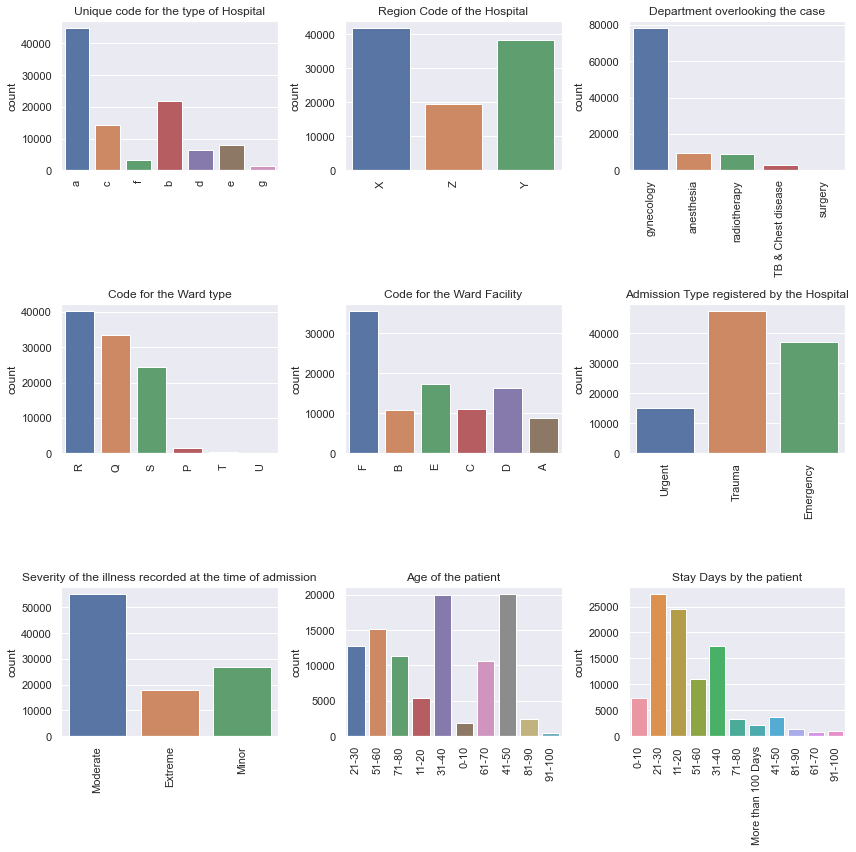

In [ ]:
# Let's check the distributions

# I'll make use of a plotter object
plotter = vi.plotter()

fig = plotter.categorical(df.loc[:, categorical_variables], n_columns = 3, figsize = (12, 12))

Data is a bit imbalanced for the different categorical variables. However, the only one that actual worries me is the imbalance in our target variable: "Stay Days by the patient".

This will likely bias the results.

Let's check now the numerical variables

## Numerical variables

In [ ]:
# To save all the numerical variables
numerical_variables = []

# Iterate over all the columns
for col in df.columns:
    # For those whose data isn't object type (then, it has to be either float or int)
    if df.loc[:, col].dtypes != "object":
        # Save them into our list
        numerical_variables.append(col)

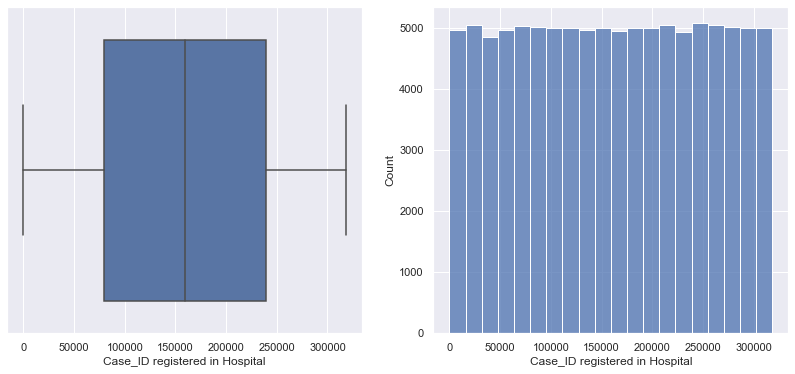

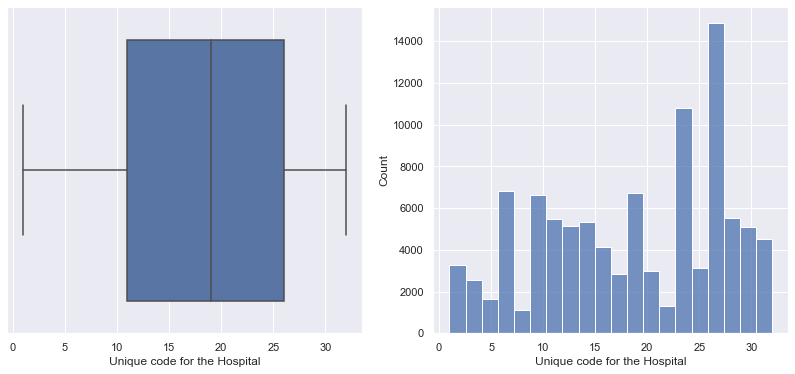

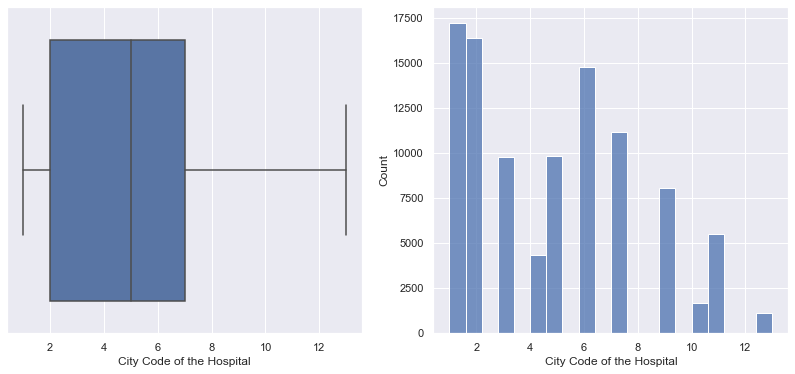

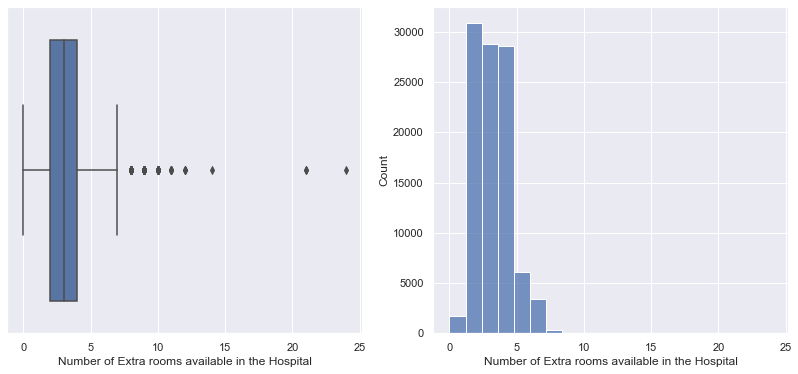

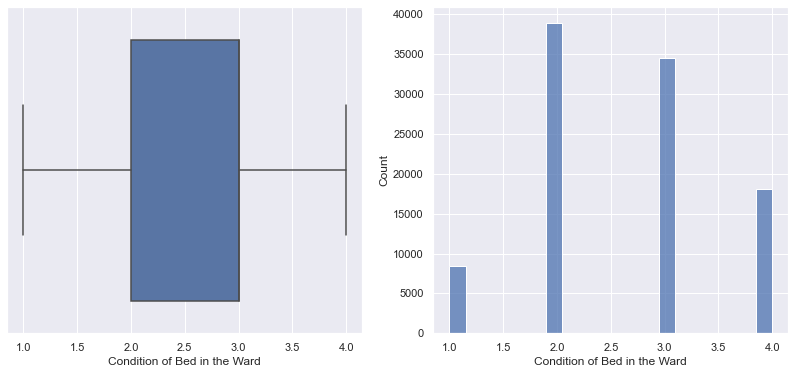

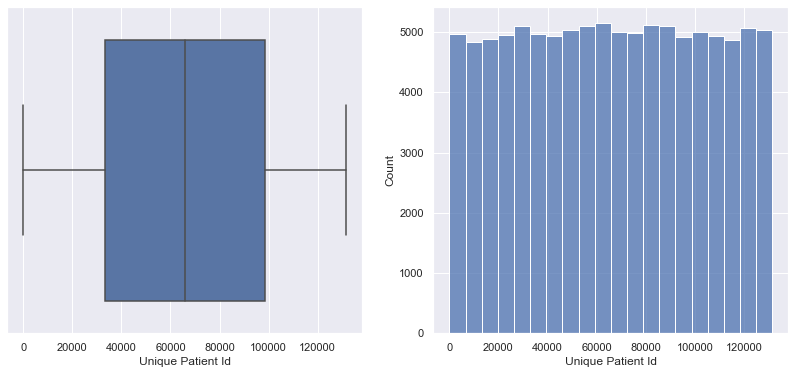

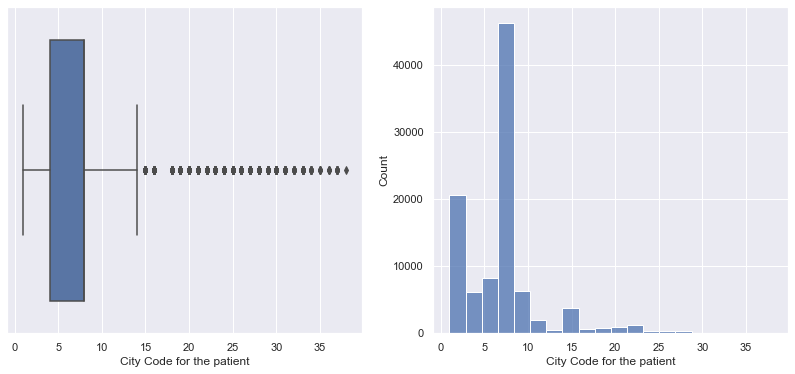

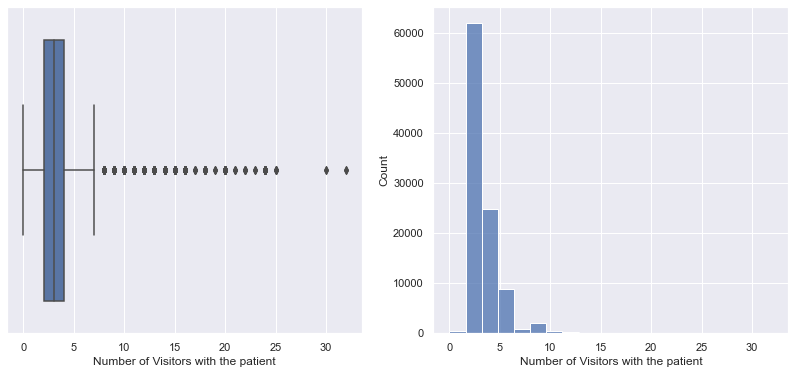

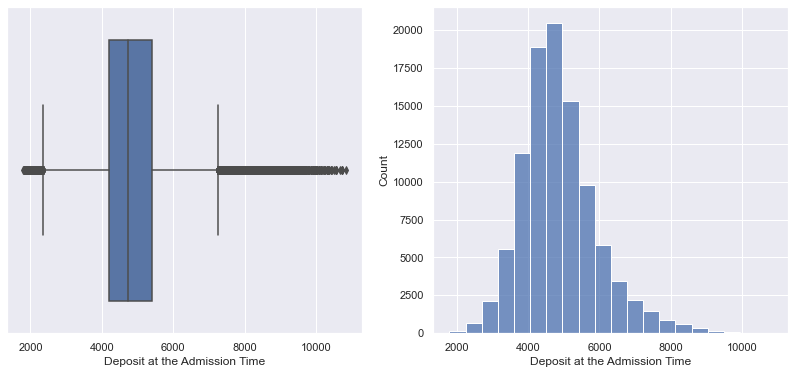

In [ ]:
fig = plotter.numerical(df.loc[:, numerical_variables])


We have some outliers in several numerical variables.

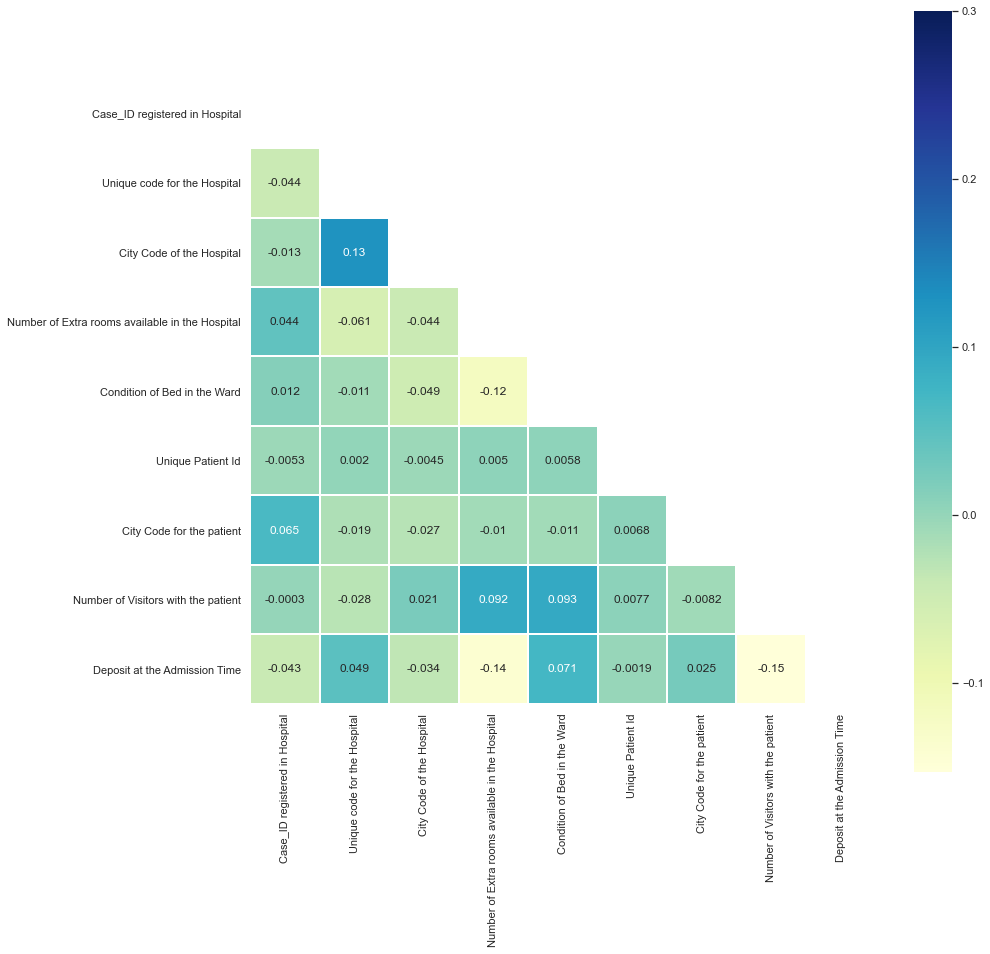

In [ ]:
# Let's get the correlation matrix

plotter.correlation_matrix(df.corr())

Of course, here we can't see the correlation with the categorical variables. Let's transform them to have a full correlation matrix.

## Test transformations

In [ ]:
# Let's start with the dummy variables
df2 = pd.get_dummies(df, prefix = ["hospital_type", "hospital_city", "hospital_region", "department", "ward_type", "ward_facility"], columns = ["Unique code for the type of Hospital", "City Code of the Hospital", "Region Code of the Hospital", "Department overlooking the case", "Code for the Ward type", "Code for the Ward Facility"])

In [ ]:
# Now we can encode the ordinal variables
# As the order here matters, using OneHot Encoder or similar wouldn't be completely accurate as they work alphabetic wise


#### Mappers
# Admission Type registered by the Hospital
dict_1 = {
    "Emergency" : 1,
    "Trauma" : 2,
    "Urgent" : 3
}

# Severity of the illness recorded at the time of admission
dict_2 = {
    "Minor" : 1,
    "Moderate" : 2,
    "Extreme" : 3
}

# Age of the patient
dict_3 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
}

# Stay Days by the patient
dict_4 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
    "More than 100 Days" : 11
}

#### Transformation
df2["admission_type_enc"] = df2["Admission Type registered by the Hospital"].map(dict_1)
df2["illness_severity_enc"] = df2["Severity of the illness recorded at the time of admission"].map(dict_2)
df2["admission_type_enc"] = df2["Age of the patient"].map(dict_3)
df2["target_enc"] = df2["Stay Days by the patient"].map(dict_4)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Case_ID registered in Hospital                             100000 non-null  int64  
 1   Unique code for the Hospital                               100000 non-null  int64  
 2   Number of Extra rooms available in the Hospital            100000 non-null  int64  
 3   Condition of Bed in the Ward                               99967 non-null   float64
 4   Unique Patient Id                                          100000 non-null  int64  
 5   City Code for the patient                                  98517 non-null   float64
 6   Admission Type registered by the Hospital                  100000 non-null  object 
 7   Severity of the illness recorded at the time of admission  100000 non-null  object 


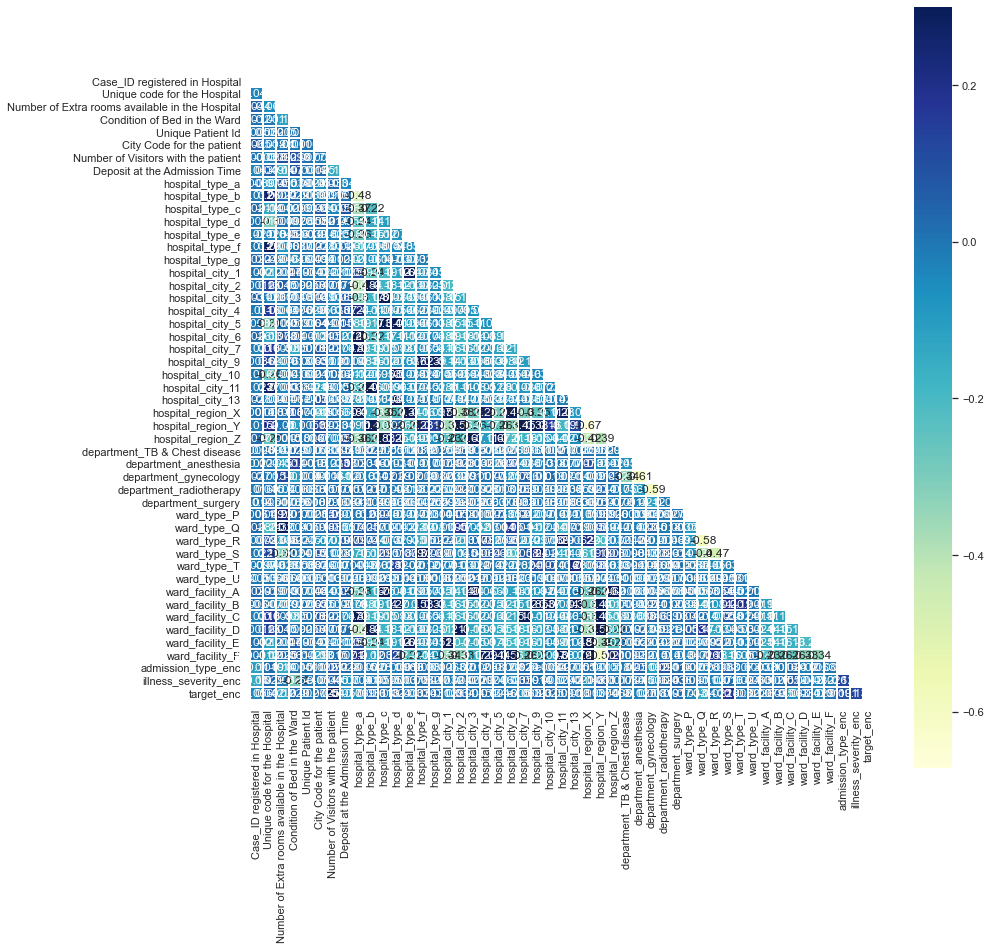

In [ ]:
plotter.correlation_matrix(df2.corr())

In [ ]:
# A bit hard to see anything in there, so let's get the correlations list sorted
df2.corr().loc["target_enc"].sort_values(ascending = False)

target_enc                                         1.000000
Number of Visitors with the patient                0.543491
ward_type_S                                        0.183120
illness_severity_enc                               0.125333
admission_type_enc                                 0.090520
Unique code for the Hospital                       0.041750
hospital_type_b                                    0.035720
ward_facility_B                                    0.034736
ward_facility_D                                    0.034281
hospital_city_2                                    0.034281
hospital_type_f                                    0.033919
hospital_type_g                                    0.031261
Condition of Bed in the Ward                       0.029388
hospital_city_10                                   0.024576
hospital_type_d                                    0.024264
hospital_city_9                                    0.023135
department_radiotherapy                 

Now that we have an idea of what's going on with our data, let's get the baseline model.